In [15]:
FILEPATH = '../data/dataset.csv'

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import joblib

from xgboost import XGBClassifier

df = pd.read_csv(FILEPATH)
df.head()

df.info()
df.describe()

X = df.drop(columns=["target_variable", "id"])
y = df["target_variable"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Add this to your code after the train_test_split
print(y_train.value_counts(normalize=True))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



model = XGBClassifier(
    n_estimators=100,  # nombre d’arbres
    max_depth=12,  # profunditat màxima dels arbres
    learning_rate=0.1,  # taxa d’aprenentatge
    subsample=0.9,  # fracció de dades per cada arbre
    colsample_bytree=0.8,  # fracció de features per cada arbre
    scale_pos_weight=1,  # ajust per classes desbalancejades (pots modificar-ho)
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35899 entries, 0 to 35898
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          35899 non-null  int64  
 1   product_A_sold_in_the_past  35899 non-null  float64
 2   product_B_sold_in_the_past  35899 non-null  float64
 3   product_A_recommended       35899 non-null  float64
 4   product_A                   35899 non-null  float64
 5   product_C                   35899 non-null  float64
 6   product_D                   35899 non-null  float64
 7   cust_hitrate                35899 non-null  float64
 8   cust_interactions           35899 non-null  float64
 9   cust_contracts              35899 non-null  float64
 10  opp_month                   35899 non-null  float64
 11  opp_old                     35899 non-null  float64
 12  competitor_Z                35899 non-null  int64  
 13  competitor_X                358

/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8309192200557103
F1: 0.8210495283018868
Precision: 0.8176746917204932
Recall: 0.8244523386619301


In [17]:
param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_depth': [3, 5, 7, 10],  # <-- Note the sane values
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],      # Row sampling
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # Column sampling
}

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=1 # Explicitly set to 1 (or just remove it, 1 is default)
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=25,
    cv=3,
    scoring='f1',  # Still optimizing for F1!
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

# 4. Get the best model
print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_

# 5. Evaluate the best model
y_pred = best_model.predict(X_test_scaled)

print("--- Best Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.9s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=700, subsample=0.8; total time=   2.3s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=700, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=700, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=700, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=700, subsample=0.7; total time=   3.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.7s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=700, subsample=0.7; total time=   3.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.9; total time=   3.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=700, subsample=0.7; total time=   3.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=700, subsample=1.0; total time=   3.6s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.9; total time=   3.7s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   3.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=700, subsample=0.9; total time=   3.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=700, subsample=1.0; total time=   3.8s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   3.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.9s

/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s


/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   1.0s

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimato

/home/backo/Documents/datathon-2025/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:24:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found: {'subsample': 0.7, 'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
--- Best Model Performance ---
Accuracy: 0.8440111420612814
F1: 0.8326359832635983
Precision: 0.8406759203379601
Recall: 0.8247483718176436


# Explainability
## Model-inbuilt feature importance

                       feature  importance
10                     opp_old    0.248085
4                    product_C    0.081252
2        product_A_recommended    0.072212
6                 cust_hitrate    0.061360
3                    product_A    0.060872
7            cust_interactions    0.054031
0   product_A_sold_in_the_past    0.052513
13                competitor_Y    0.052011
1   product_B_sold_in_the_past    0.051499
12                competitor_X    0.051169
5                    product_D    0.048627
11                competitor_Z    0.046226
9                    opp_month    0.041567
8               cust_contracts    0.039871
14              cust_in_iberia    0.038706


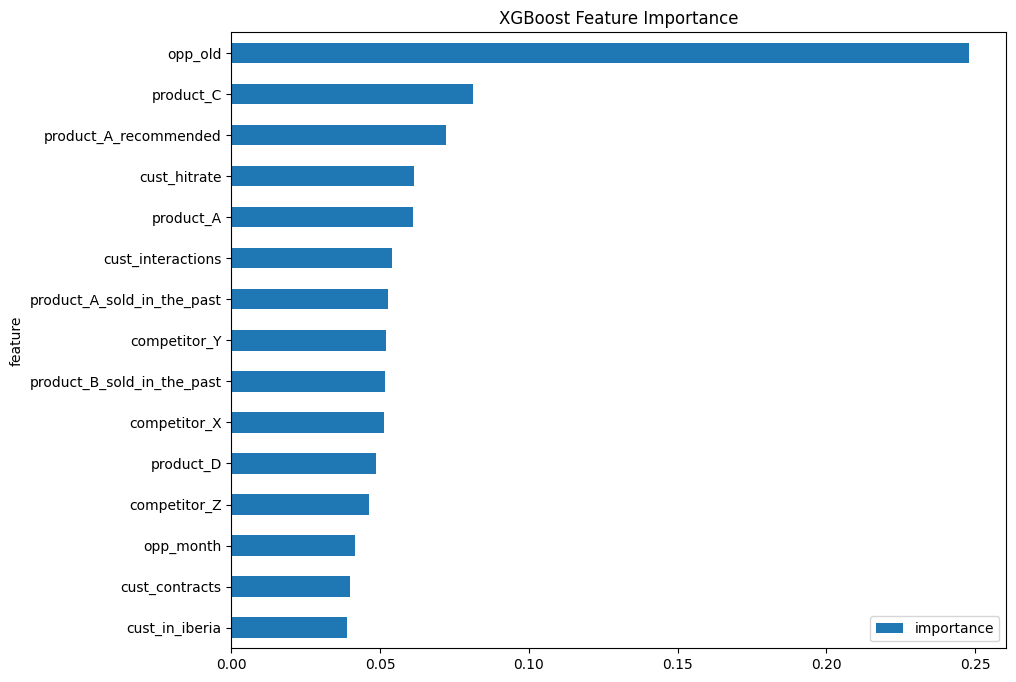

In [18]:
# Get the feature importances
importances = best_model.feature_importances_

# Get your feature names (assuming 'X' is your original unscaled DataFrame)
feature_names = X.columns

# Create a simple bar plot
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feat_imp_df.sort_values(by='importance', ascending=False))

# You can plot this with matplotlib/seaborn
feat_imp_df.sort_values(by='importance').plot(kind='barh', x='feature', y='importance', figsize=(10, 8))
plt.title("XGBoost Feature Importance")
plt.show()

## SHAP (SHapley Additive exPlanations)

Generating SHAP summary plot...


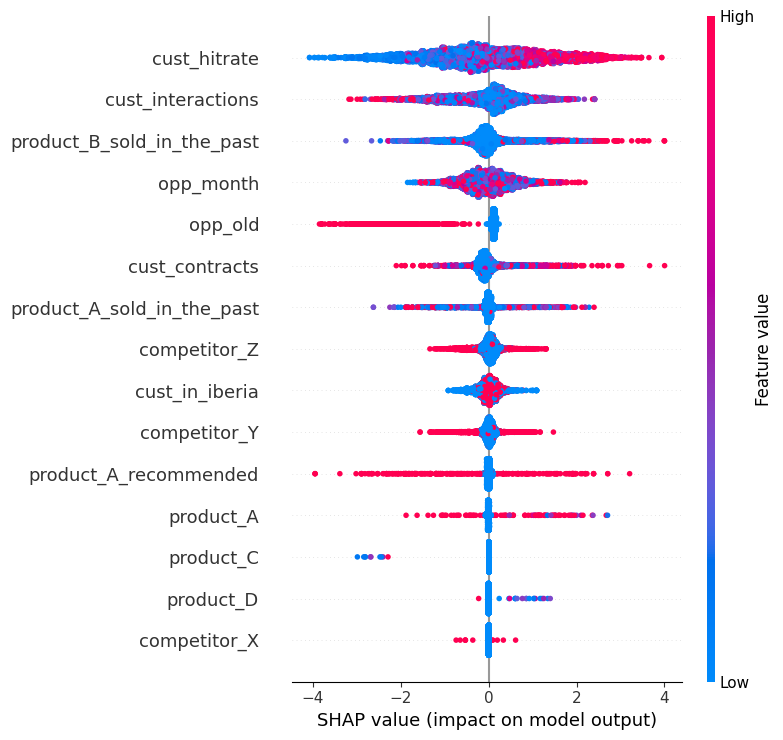

In [19]:
import shap

# Use TreeExplainer for tree models like XGBoost (it's fast)
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values (use your test data)
# This can take a moment
shap_values = explainer(X_test_scaled)

# --- THIS IS THE MONEY PLOT ---
# This plot shows global feature importance AND the direction of the effect
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

### Bar chart

Generating SHAP bar plot...


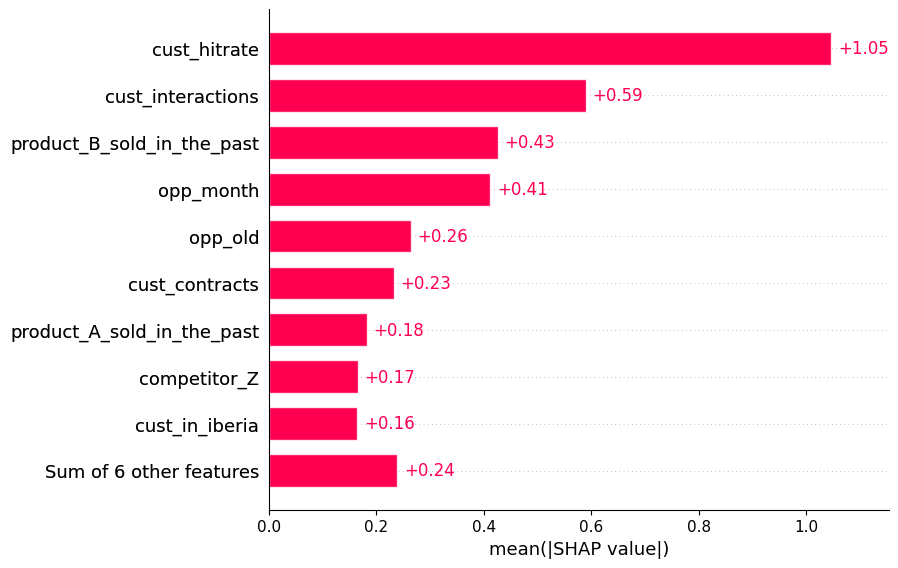

In [20]:
# Assuming you already have this:
# shap_values = explainer(X_test_scaled)

# --- THE FIX ---
# Manually add the feature names to the shap_values object
shap_values.feature_names = X.columns

# --- NOW IT WORKS ---
# Run the plot command again, with NO 'feature_names' argument
print("Generating SHAP bar plot...")
shap.plots.bar(shap_values)

plt.show()

Generating SHAP Beeswarm Plot...


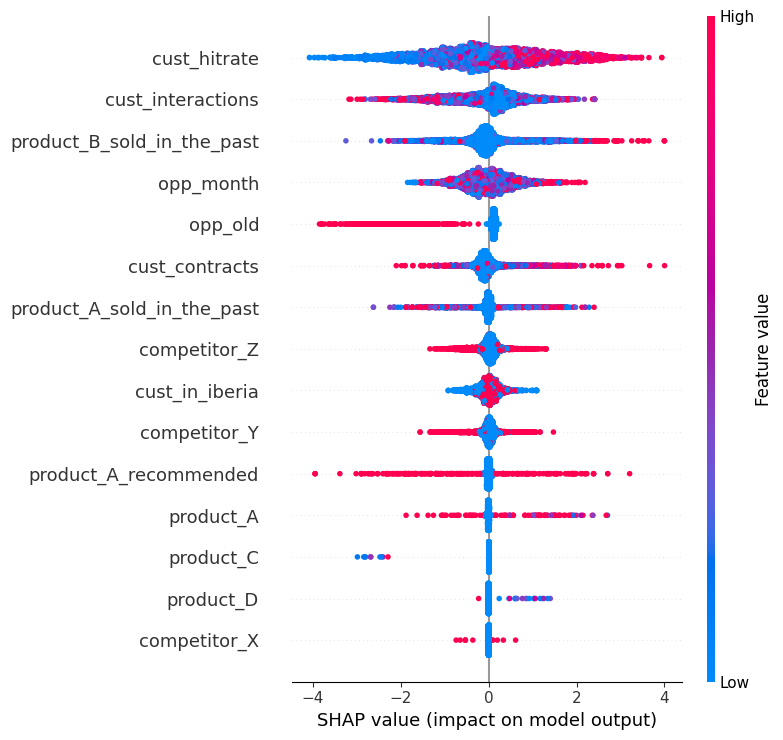

In [21]:
import shap
import matplotlib.pyplot as plt

# Generate the plot. The default plot_type ('dot' or beeswarm)
# is the one that shows positive/negative separation.
print("Generating SHAP Beeswarm Plot...")
shap.summary_plot(shap_values, X_test_scaled)
plt.show()

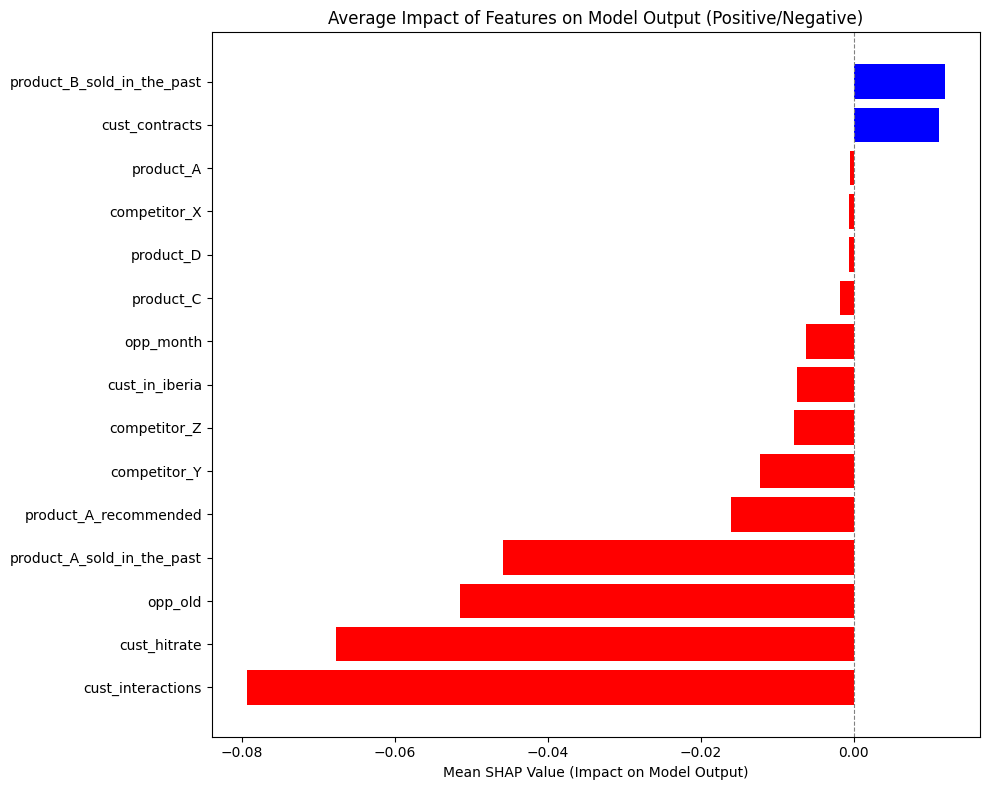

In [22]:
import shap
import matplotlib.pyplot as plt
import numpy as np # For calculating the mean

# Assuming shap_values and X.columns are already defined and shap_values.feature_names is set

# Calculate the mean SHAP value for each feature
# This will preserve the sign (positive or negative)
mean_shap_values = shap_values.values.mean(axis=0)

# Create a DataFrame for easier plotting and sorting
shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_shap_value': mean_shap_values
})

# Sort the features by their mean SHAP value for a cleaner plot
shap_df = shap_df.sort_values(by='mean_shap_value', ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(shap_df['feature'], shap_df['mean_shap_value'],
         color=['red' if x < 0 else 'blue' for x in shap_df['mean_shap_value']]) # Color based on sign
plt.xlabel("Mean SHAP Value (Impact on Model Output)")
plt.title("Average Impact of Features on Model Output (Positive/Negative)")
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8) # Add a vertical line at 0 for separation
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


--- Explaining Prediction for Case Index 4 ---
Generating SHAP Waterfall plot...


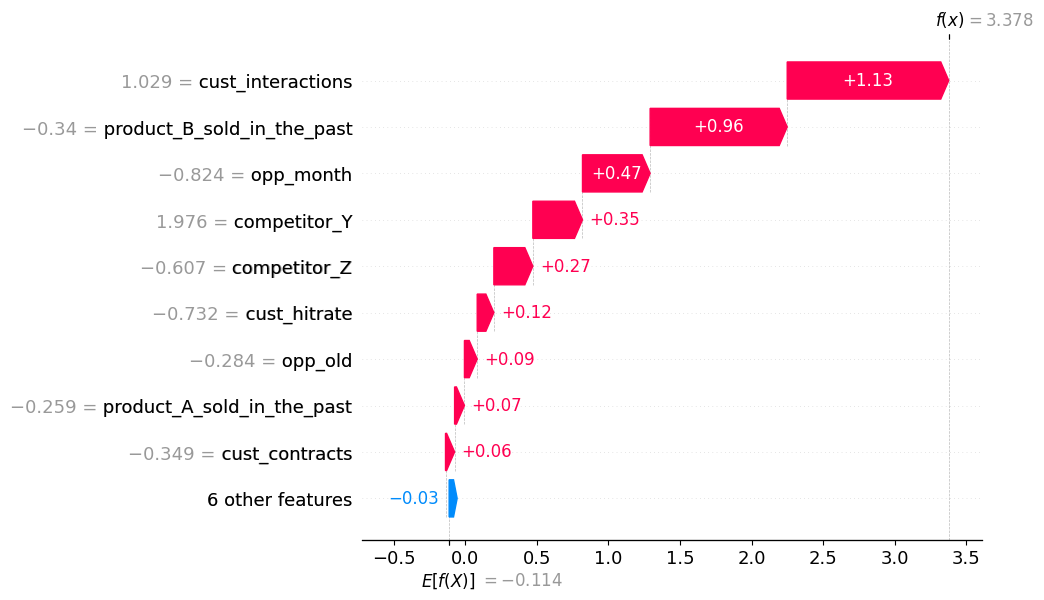


LIME and SHAP plots generated. Check the new window/figures for the visualizations.


In [24]:
instance_index = 4
data_for_lime = X_test_scaled[instance_index]
original_values = X_test.iloc[instance_index]

# Output the predicted class
predicted_proba = best_model.predict_proba(data_for_lime.reshape(1, -1))[0]
predicted_class = np.argmax(predicted_proba)

print(f"\n--- Explaining Prediction for Case Index {instance_index} ---")

# The Waterfall plot takes the specific explanation object for the instance
# Note: shap_values is a list of Explanation objects; index 4 is the one we want.
print("Generating SHAP Waterfall plot...")
shap.plots.waterfall(shap_values[instance_index])

plt.show()

print("\nLIME and SHAP plots generated. Check the new window/figures for the visualizations.")
